# Packages Installation


# Cardiovascular Disease Risk Factors Analysis
## Interpretable Machine Learning lectures, Tutorial #1

This dataset contains detailed information on the risk factors for cardiovascular disease. It includes information on age, gender, height, weight, blood pressure values, cholesterol levels, glucose levels, smoking habits and alcohol consumption of over 70 thousand individuals. Additionally it outlines if the person is active or not and if he or she has any cardiovascular diseases. This dataset provides a great resource for researchers to apply modern machine learning techniques to explore the potential relations between risk factors and cardiovascular disease that can ultimately lead to improved understanding of this serious health issue and design better preventive measures. This dataset can be used to explore the risk factors of cardiovascular disease in adults. The aim is to understand how certain demographic factors, health behaviors and biological markers affect the development of heart disease.

Adapted from the Kaggle website and the Interpretable Machine Learning with Python book.

In [ ]:
# !pip install --upgrade pandas numpy statsmodels scikit-learn matplotlib ## Preinstalled on Google Colab
!pip install --upgrade machine-learning-datasets
!pip install seaborn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl 

### Loading the Libraries


In [ ]:
import math
import machine_learning_datasets as mldatasets
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data and Visual Analysis
This dataset can be used to explore the risk factors of cardiovascular disease in adults. The aim is to understand how certain demographic factors, health behaviors and biological markers affect the development of heart disease.
To start, look through the columns of data and familiarize yourself with each one. Understand what each field means and how it relates to heart health:
- Age: Age of participant (integer, days)
- Gender: Gender of participant (male/female).
- Height: Height measured in centimeters (integer)
- Weight: Weight measured in kilograms (integer)
- Ap_hi: Systolic blood pressure reading taken from patient (integer)
- Ap_lo : Diastolic blood pressure reading taken from patient (integer)
- Cholesterol : Total cholesterol level read as mg/dl on a scale 0 - 5+ units( integer). Each unit denoting increase/decrease by 20 mg/dL respectively.
- Gluc : Glucose level read as mmol/l on a scale 0 - 16+ units( integer). Each unit denoting increase Decreaseby 1 mmol/L respectively.             
- Smoke  : Whether person smokes or not(binary; 0= No , 1=Yes).
- Alco : Whether person drinks alcohol or not(binary; 0 =No ,1 =Yes ).
- Active : whether person physically active or not( Binary ;0 =No,1 = Yes ).
- Cardio ­­ : whether person suffers from cardiovascular diseases or not(Binary ;0 – no , 1 ­‑yes ).



In [ ]:
cvd_df = mldatasets.load("cardiovascular-disease")
cvd_df.info()
cvd_df['age'] =  cvd_df['age'] / 365.24

https://raw.githubusercontent.com/caravanuden/cardio/master/cardio_train.csv downloaded to /content/data/cardio_train.csv
1 dataset files found in /content/data folder
parsing /content/data/cardio_train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [ ]:
cvd_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.358668,2,168,62.0,110,80,1,1,0,0,1,0
1,55.382762,1,156,85.0,140,90,3,1,0,0,1,1
2,51.629066,1,165,64.0,130,70,3,1,0,0,0,1
3,48.250465,2,169,82.0,150,100,1,1,0,0,1,1
4,47.842515,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.677691,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.879860,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.201292,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.414412,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
cvd_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.304309,6.755152,29.564122,48.36272,53.945351,58.391742,64.924433
gender,70000.0,1.349571,0.476838,1.000000,1.00000,1.000000,2.000000,2.000000
height,70000.0,164.359229,8.210126,55.000000,159.00000,165.000000,170.000000,250.000000
weight,70000.0,74.205690,14.395757,10.000000,65.00000,72.000000,82.000000,200.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.00000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.00000,80.000000,90.000000,11000.000000
cholesterol,70000.0,1.366871,0.680250,1.000000,1.00000,1.000000,2.000000,3.000000
gluc,70000.0,1.226457,0.572270,1.000000,1.00000,1.000000,1.000000,3.000000
smoke,70000.0,0.088129,0.283484,0.000000,0.00000,0.000000,0.000000,1.000000
alco,70000.0,0.053771,0.225568,0.000000,0.00000,0.000000,0.000000,1.000000


The high and low blood pressures both take non-physical values (negative, very large). This suggests faulty data that should be removed.

In [ ]:
cvd_df = cvd_df[(cvd_df['ap_lo'] <= 370) & (cvd_df['ap_lo'] > 0)].reset_index(drop=True)
cvd_df = cvd_df[(cvd_df['ap_hi'] <= 370) & (cvd_df['ap_hi'] > 0)].reset_index(drop=True)
cvd_df = cvd_df[cvd_df['ap_hi'] >= cvd_df['ap_lo']].reset_index(drop=True)

<Axes: >

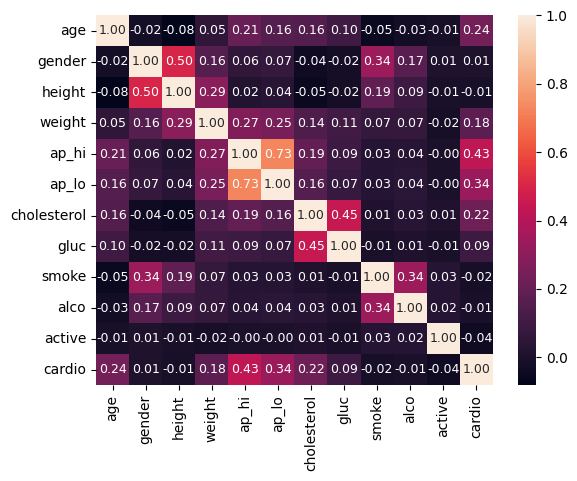

In [ ]:
sns.heatmap(cvd_df.corr(),annot=True,fmt=".2f",annot_kws={'fontsize':9})

## Separating features from target and conducting data partition.

In [ ]:
y = cvd_df['cardio']
X = cvd_df.drop(['cardio'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

## Fitting a basic logistic regression model

In [ ]:
log_model = sm.Logit(y_train, sm.add_constant(X_train))
log_result = log_model.fit()
print(log_result.summary2())

Optimization terminated successfully.
         Current function value: 0.561557
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: cardio           Pseudo R-squared: 0.190     
Date:               2024-05-23 08:30 AIC:              65618.3485
No. Observations:   58404            BIC:              65726.0502
Df Model:           11               Log-Likelihood:   -32797.   
Df Residuals:       58392            LL-Null:          -40481.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const         -11.1730   0.2504 -44.6182 0.0000 -11.6638 -10.6822
age             0.0510   0.0015  34.7971 0.0000   0.0482   0.0539


# Visualizing effects plot

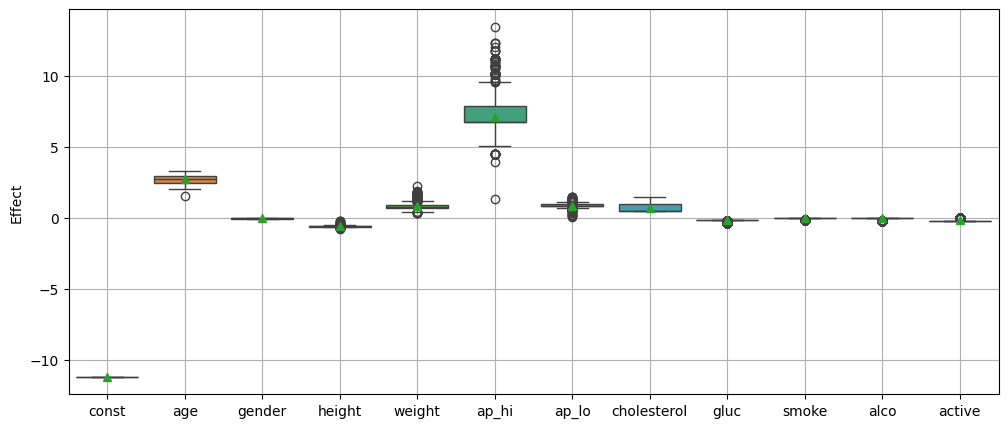

In [ ]:
yhat_test = log_model.predict(log_result.params,exog=sm.add_constant(X_test))
effects_test = sm.add_constant(X_test)
for column in effects_test.columns:
  effects_test[column] *= log_result.params[column]

fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(data=effects_test,showmeans=True)
ax.set_ylabel('Effect')
plt.grid()

# Effects for one example

Instance f{index}:
Feature values age             58.42186
gender           1.00000
height         169.00000
weight          74.00000
ap_hi          120.00000
ap_lo           70.00000
cholesterol      1.00000
gluc             1.00000
smoke            0.00000
alco             0.00000
active           1.00000
Name: 57238, dtype: float64
Prediction 0.00 (avg prediction: 0.49)


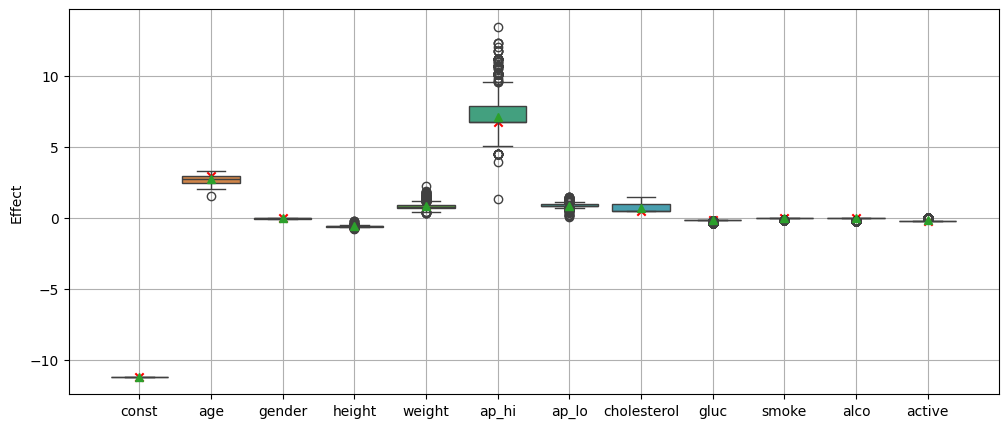

In [ ]:
index = 60
print('Instance f{index}:')
print('Feature values', X_test.iloc[index])
print('Prediction %.2f (avg prediction: %.2f)' % (y_test[index], y_test.mean()) )

fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(data=effects_test,showmeans=True)
ax.scatter(range(len(effects_test.columns)), effects_test.iloc[index].to_numpy(),c='red',marker='x')
ax.set_ylabel('Effect')
plt.grid()


# Adding pointwise non-linear effects.
There is no reason to assume that (blood pressure, weight, age or height) are related to the log-odd-ratio of the risk factor in a linear fashion. Non-linear transformation is required? Let's try fitting a GAM.

<Axes: xlabel='ap_hi', ylabel='ap_lo'>

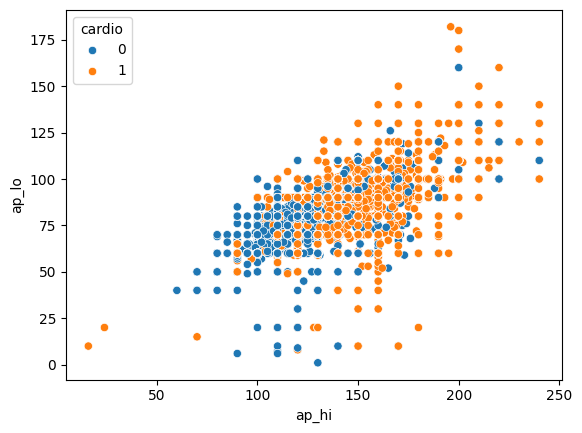

In [ ]:
sns.scatterplot(data=cvd_df,x='ap_hi',y='ap_lo',hue='cardio')

<Axes: xlabel='age', ylabel='weight'>

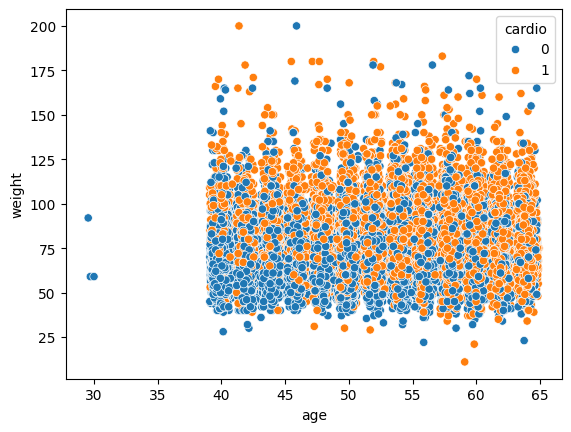

In [ ]:
sns.scatterplot(data=cvd_df,x='age',y='weight',hue='cardio')

### The statsmodel package provides valuable uncertainty estimates for the coefficients, whereas scikit-learn pipelines are easier to fit, manipulate, and analyze. It's worth using both...

In [ ]:
from statsmodels.gam.api import GLMGam, BSplines

x_spline = X_train[['ap_hi','ap_lo', 'age','weight']]
bs = BSplines(x_spline, df=[6, 6,6,6],degree=[3, 3,3,3])

log_model = GLMGam(y_train, exog=sm.add_constant(X_train), smoother=bs, alpha=0, family=sm.families.Binomial() )
log_model_fit = log_model.fit()
print(log_model_fit.summary2())

yhat_test = log_model_fit.predict(exog=sm.add_constant(X_test),exog_smooth=X_test[['ap_hi','ap_lo', 'age','weight']])


                         Results: GLMGam
Model:              GLMGam           AIC:            64656.0234  
Link Function:      Logit            BIC:            -576084.7294
Dependent Variable: cardio           Log-Likelihood: -32300.     
Date:               2024-05-23 08:31 LL-Null:        -40481.     
No. Observations:   58404            Deviance:       64600.      
Df Model:           26               Pearson chi2:   6.09e+04    
Df Residuals:       58376            Scale:          1.0000      
Method:             IRLS                                         
-----------------------------------------------------------------
                Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const          -21.0704   5.4154 -3.8908 0.0001 -31.6844 -10.4564
age              0.1262   0.0493  2.5577 0.0105   0.0295   0.2229
gender          -0.0295   0.0242 -1.2196 0.2226  -0.0769   0.0179
height          -0.0028   0.0014 -1

In [ ]:
from sklearn.preprocessing import SplineTransformer,StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import classification_report,roc_auc_score

feature_list = ['ap_hi','ap_lo', 'age','weight','height','cholesterol','gluc']

bspline = ColumnTransformer(
    [("Bspline", SplineTransformer(n_knots=5,degree=3,knots='quantile',extrapolation='constant'),
      feature_list)],remainder='passthrough'
) # Apply B-splines to features in the feature list, and keep the others as is.


full_regressor = Pipeline([('Spline',bspline), # B-spline feature transformation.
                          ('Scaler',StandardScaler()), # Standardize to zero mean and unit variance for improved numerical stability.
                           ('Logistic',LogisticRegressionCV())] # Ridge regression with L2 regularization, with penalty optimized by cross-validation.
                          )
full_regressor.fit(X_train,y_train)

no_spline_regressor = Pipeline([('Scaler',StandardScaler()), ('Logistic',LogisticRegressionCV())])
no_spline_regressor.fit(X_train,y_train)


print('Model with splines')
print(classification_report( y_test, full_regressor.predict(X_test) ))
print('AUCROC score: %.3f' % roc_auc_score( y_test, full_regressor.predict(X_test) ))


print('Model without splines')
print(classification_report( y_test, no_spline_regressor.predict(X_test) ))
print('AUCROC score: %.3f' % roc_auc_score( y_test, no_spline_regressor.predict(X_test) ))




Model with splines
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      5292
           1       0.76      0.67      0.71      5015

    accuracy                           0.74     10307
   macro avg       0.74      0.73      0.73     10307
weighted avg       0.74      0.74      0.73     10307

AUCROC score: 0.733
Model without splines
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      5292
           1       0.75      0.67      0.71      5015

    accuracy                           0.73     10307
   macro avg       0.73      0.73      0.73     10307
weighted avg       0.73      0.73      0.73     10307

AUCROC score: 0.728


## Visualizing the individual components $f_j$ of the GAM model.
$ f(x^{(i)}) = \sum_j f_j(x_j^{(i)})$

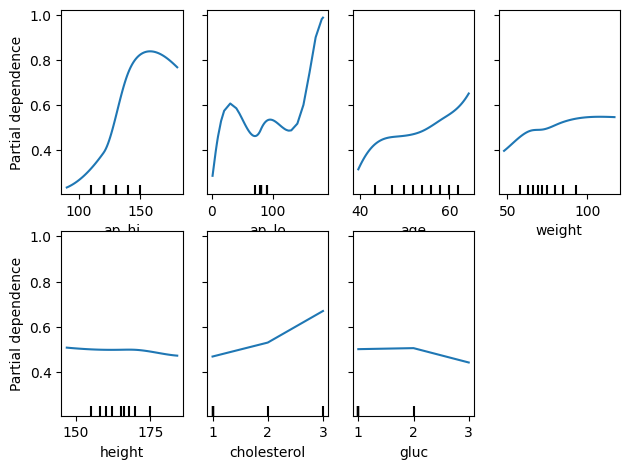

In [ ]:
PartialDependenceDisplay.from_estimator(full_regressor, X_train, feature_list,
                                         percentiles=(0.01, 0.99), n_cols=4)
plt.tight_layout()

## Calculating feature effects for a GAM model
### ## Code to calculate feature effects with a scikit-learn pipeline


['Bspline__ap_hi_sp_0' 'Bspline__ap_hi_sp_1' 'Bspline__ap_hi_sp_2'
 'Bspline__ap_hi_sp_3' 'Bspline__ap_hi_sp_4' 'Bspline__ap_hi_sp_5'
 'Bspline__ap_hi_sp_6' 'Bspline__ap_lo_sp_0' 'Bspline__ap_lo_sp_1'
 'Bspline__ap_lo_sp_2' 'Bspline__ap_lo_sp_3' 'Bspline__ap_lo_sp_4'
 'Bspline__ap_lo_sp_5' 'Bspline__ap_lo_sp_6' 'Bspline__age_sp_0'
 'Bspline__age_sp_1' 'Bspline__age_sp_2' 'Bspline__age_sp_3'
 'Bspline__age_sp_4' 'Bspline__age_sp_5' 'Bspline__age_sp_6'
 'Bspline__weight_sp_0' 'Bspline__weight_sp_1' 'Bspline__weight_sp_2'
 'Bspline__weight_sp_3' 'Bspline__weight_sp_4' 'Bspline__weight_sp_5'
 'Bspline__weight_sp_6' 'Bspline__height_sp_0' 'Bspline__height_sp_1'
 'Bspline__height_sp_2' 'Bspline__height_sp_3' 'Bspline__height_sp_4'
 'Bspline__height_sp_5' 'Bspline__height_sp_6' 'Bspline__cholesterol_sp_0'
 'Bspline__cholesterol_sp_1' 'Bspline__cholesterol_sp_2'
 'Bspline__cholesterol_sp_3' 'Bspline__cholesterol_sp_4'
 'Bspline__cholesterol_sp_5' 'Bspline__cholesterol_sp_6'
 'Bspline__gluc_sp_

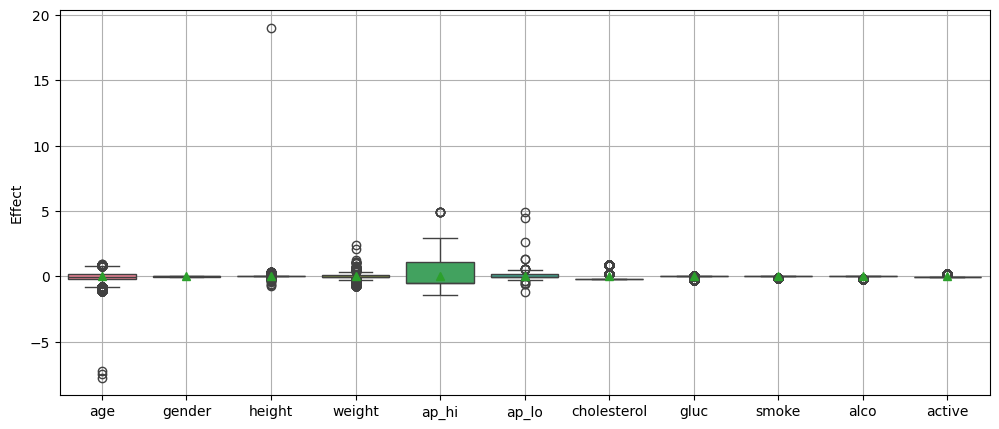

In [ ]:
transformed_features = full_regressor[:-1].transform(X_train) # Get features after applying the various feature maps (normalization, B-splines, etc.)
transformed_feature_names = full_regressor[:-1].get_feature_names_out() # Get their name (automated sklearn naming)
print(transformed_feature_names)
coefficients = full_regressor[-1].coef_ # Regression coefficients after feature map.
transformed_features_effects = transformed_features * coefficients # Effects of the *transformed* features.

features_effects = np.array([
    transformed_features_effects[:, [i for i,transformed_feature_name in enumerate(transformed_feature_names) if feature_name in transformed_feature_name] ].sum(-1) for feature_name in X_train.columns]).T
    # Total feature effects, defined as the sum over the respective transformed features.

features_effects = pd.DataFrame(features_effects,columns=X_train.columns)
feature_importance = features_effects.std() #features_effects.quantile(0.9) -  features_effects.quantile(0.1)
ordered_features = features_effects.columns[np.argsort(feature_importance.to_numpy())[::-1]]

fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(data=features_effects[ordered_features],showmeans=True)
ax.set_ylabel('Effect')
# ax.set_ylim([-2,10.])
plt.grid()



## Conclusion from fitting the GAM model:
- ap_lo blood pressure feature exhibits non-monotonic PDP trend. It is also strongly correlated with ap_hi blood pressure. It is worth attempting to decorrelate for improved interpretability.
- Weight and height are correlated, and have opposite behaviors. It will be easier to interpret the effect after decoupling "height" and "fattyness" by calculating the BMI.
- Gender seems like an irrelevant feature
- Smoking has a negative coefficient. Interpretation :) ?
- The splines tend to create outlier effects for outlier feature values.

## GAM model, iteration #2

<Axes: >

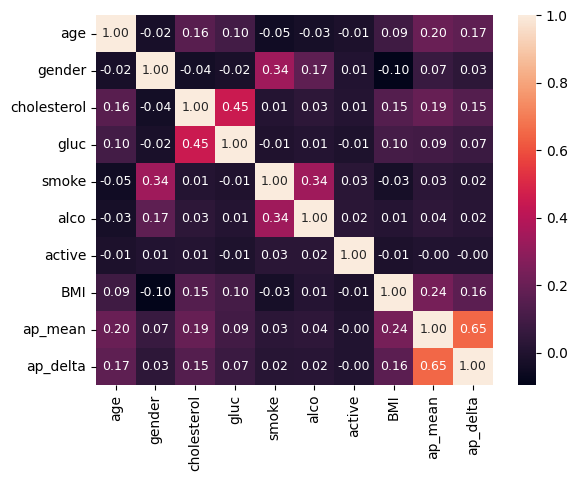

In [ ]:
# Reformat features
y = cvd_df['cardio']
X = cvd_df.drop(['cardio'], axis=1).copy()
X['BMI'] = X['weight'] / (X['height']/100) **2 # Create BMI feature.
X['ap_mean'] = (X['ap_hi'] + X['ap_lo'])/2
X['ap_delta'] = X['ap_hi'] - X['ap_lo']
X = X.drop(columns=['weight','ap_hi','ap_lo','height'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

sns.heatmap(X.corr(),annot=True,fmt=".2f",annot_kws={'fontsize':9})

Model with splines
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      5292
           1       0.76      0.67      0.71      5015

    accuracy                           0.74     10307
   macro avg       0.74      0.73      0.73     10307
weighted avg       0.74      0.74      0.73     10307

AUCROC score: 0.733
Model without splines
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      5292
           1       0.75      0.67      0.71      5015

    accuracy                           0.73     10307
   macro avg       0.73      0.73      0.73     10307
weighted avg       0.73      0.73      0.73     10307

AUCROC score: 0.728


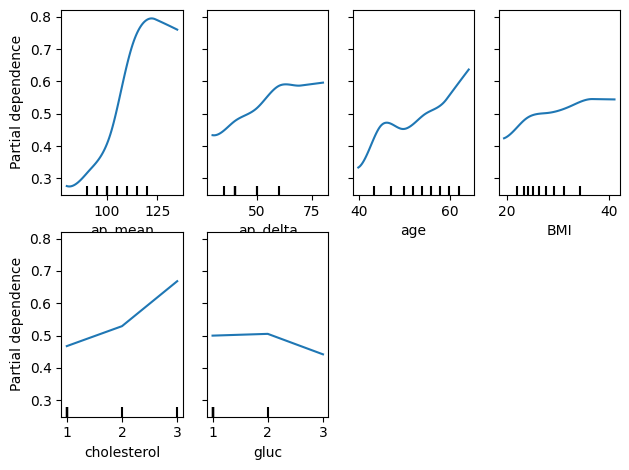

In [ ]:


feature_list = ['ap_mean','ap_delta', 'age','BMI','cholesterol','gluc']

n_knots = 5
max_min = np.array(X_train[feature_list].quantile([0.02, 0.98]) ) # Knots range uniformly between [2%, 98% of data] rather than quantiles.
knots = (np.arange(n_knots) / n_knots )[:,np.newaxis] * (max_min[1]- max_min[0])[np.newaxis,:] + max_min[0][np.newaxis,:]

bspline = ColumnTransformer(
    [("Bspline", SplineTransformer(n_knots=5,degree=3,knots=knots,extrapolation='linear'),
      feature_list)],remainder='passthrough'
)
full_regressor = Pipeline([('Spline',bspline),('Scaler',StandardScaler()), ('Logistic',LogisticRegressionCV())])
full_regressor.fit(X_train,y_train)

no_spline_regressor = Pipeline([('Scaler',StandardScaler()), ('Logistic',LogisticRegressionCV())])
no_spline_regressor.fit(X_train,y_train)



print('Model with splines')
print(classification_report( y_test, full_regressor.predict(X_test) ))
print('AUCROC score: %.3f' % roc_auc_score( y_test, full_regressor.predict(X_test) ))


print('Model without splines')
print(classification_report( y_test, no_spline_regressor.predict(X_test) ))
print('AUCROC score: %.3f' % roc_auc_score( y_test, no_spline_regressor.predict(X_test) ))




PartialDependenceDisplay.from_estimator(full_regressor, X_train, feature_list,
                                         percentiles=(0.02, 0.98), n_cols=4)
plt.tight_layout()




## Feature effects plots

['Bspline__ap_mean_sp_0' 'Bspline__ap_mean_sp_1' 'Bspline__ap_mean_sp_2'
 'Bspline__ap_mean_sp_3' 'Bspline__ap_mean_sp_4' 'Bspline__ap_mean_sp_5'
 'Bspline__ap_mean_sp_6' 'Bspline__ap_delta_sp_0' 'Bspline__ap_delta_sp_1'
 'Bspline__ap_delta_sp_2' 'Bspline__ap_delta_sp_3'
 'Bspline__ap_delta_sp_4' 'Bspline__ap_delta_sp_5'
 'Bspline__ap_delta_sp_6' 'Bspline__age_sp_0' 'Bspline__age_sp_1'
 'Bspline__age_sp_2' 'Bspline__age_sp_3' 'Bspline__age_sp_4'
 'Bspline__age_sp_5' 'Bspline__age_sp_6' 'Bspline__BMI_sp_0'
 'Bspline__BMI_sp_1' 'Bspline__BMI_sp_2' 'Bspline__BMI_sp_3'
 'Bspline__BMI_sp_4' 'Bspline__BMI_sp_5' 'Bspline__BMI_sp_6'
 'Bspline__cholesterol_sp_0' 'Bspline__cholesterol_sp_1'
 'Bspline__cholesterol_sp_2' 'Bspline__cholesterol_sp_3'
 'Bspline__cholesterol_sp_4' 'Bspline__cholesterol_sp_5'
 'Bspline__cholesterol_sp_6' 'Bspline__gluc_sp_0' 'Bspline__gluc_sp_1'
 'Bspline__gluc_sp_2' 'Bspline__gluc_sp_3' 'Bspline__gluc_sp_4'
 'Bspline__gluc_sp_5' 'Bspline__gluc_sp_6' 'remainder__gender

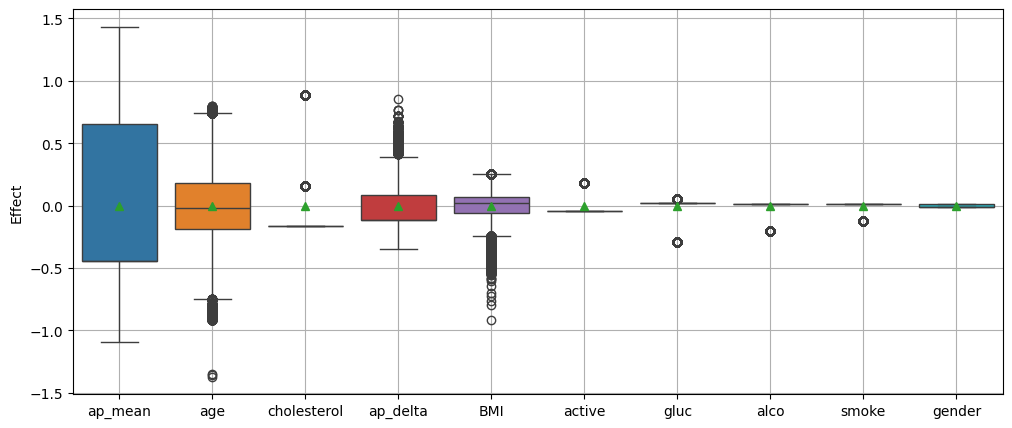

In [ ]:
transformed_features = full_regressor[:-1].transform(X_train) # Get features after applying the various feature maps (normalization, B-splines, etc.)
transformed_feature_names = full_regressor[:-1].get_feature_names_out() # Get their name (automated sklearn naming)
print(transformed_feature_names)
coefficients = full_regressor[-1].coef_ # Regression coefficients after feature map.
transformed_features_effects = transformed_features * coefficients # Effects of the *transformed* features.

features_effects = np.array([
    transformed_features_effects[:, [i for i,transformed_feature_name in enumerate(transformed_feature_names) if feature_name in transformed_feature_name] ].sum(-1) for feature_name in X_train.columns]).T
    # Total feature effects, defined as the sum over the respective transformed features.

features_effects = pd.DataFrame(features_effects,columns=X_train.columns)
feature_importance = features_effects.std() #features_effects.quantile(0.9) -  features_effects.quantile(0.1)
ordered_features = features_effects.columns[np.argsort(feature_importance.to_numpy())[::-1]]

fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(data=features_effects[ordered_features],showmeans=True)
ax.set_ylabel('Effect')
plt.grid()


## Concluding for the smoking, activity, alcohol, gender variable?
- Are they properly reported? Properly defined?
- How are participants selected?
Mismatches between percentages for the general population and the study population suggest that the sample is not fully representative.
Improper reporting is an option.

In [ ]:
print( X_train[['smoke','alco','gender','active']].mean() )

print( X_train[['smoke','alco','gender','active']].corr() )


smoke     0.088230
alco      0.053729
gender    1.349137
active    0.803678
dtype: float64
           smoke      alco    gender    active
smoke   1.000000  0.340050  0.339250  0.024263
alco    0.340050  1.000000  0.172422  0.022760
gender  0.339250  0.172422  1.000000  0.006439
active  0.024263  0.022760  0.006439  1.000000
